In [1]:
from datasets import load_dataset
from LatentPixel import LatentLlama, TGraph, BIN_FONT
from tqdm import tqdm

In [19]:
import numpy as np
from paddleocr import PaddleOCR, draw_ocr

In [2]:
data = load_dataset('lambada', split='test')
TGraph.init_render(
    dpi=80,
    font_file=BIN_FONT,
    font_size=8,
    pixels_per_patch=8,
    rgb=False,
    binary=True,
    max_seq_length=800,
    patch_len=2
)
model = LatentLlama(
    backbone_path='../../shared/checkpoints/dllama_pretrain/lpixel_pretrain/LatentLlama/20231025-162146/last/backbone/',
    num_channels=1,
    patch_len=2,
    patch_size=8,
    binary=True
)

Coder path is none, do not load compressor for this model


Some weights of LlamaForPatchCausalInference were not initialized from the model checkpoint at ../../shared/checkpoints/dllama_pretrain/lpixel_pretrain/LatentLlama/20231025-162146/last/backbone/ and are newly initialized: ['layers.7.self_attn.rotary_emb.inv_freq', 'layers.0.self_attn.rotary_emb.inv_freq', 'layers.1.self_attn.rotary_emb.inv_freq', 'layers.11.self_attn.rotary_emb.inv_freq', 'layers.10.self_attn.rotary_emb.inv_freq', 'layers.9.self_attn.rotary_emb.inv_freq', 'layers.4.self_attn.rotary_emb.inv_freq', 'layers.3.self_attn.rotary_emb.inv_freq', 'embed_tokens.weight', 'layers.8.self_attn.rotary_emb.inv_freq', 'layers.5.self_attn.rotary_emb.inv_freq', 'layers.6.self_attn.rotary_emb.inv_freq', 'layers.2.self_attn.rotary_emb.inv_freq']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
data = load_dataset('lambada', split='test')
TGraph.init_render(
    dpi=80,
    font_file=BIN_FONT,
    font_size=8,
    pixels_per_patch=8,
    rgb=False,
    binary=True,
    max_seq_length=800,
    patch_len=2
)
model = LatentLlama(
    backbone_path='storage/llama_2_backbone/',
    num_channels=1,
    patch_len=2,
    patch_size=8,
    binary=True
)

Found cached dataset lambada (/mnt/data/huggingface/lambada/plain_text/1.1.0/2e4879aaaa342d8f748b7275991006d2e27a8b0abc0a28ea299b3e3b839a3a40)


Coder path is none, do not load compressor for this model


Some weights of LlamaForPatchCausalInference were not initialized from the model checkpoint at storage/llama_2_backbone/ and are newly initialized: ['embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
def process_lambda(raw: str) -> str:
    raw = raw.replace('`` ', '"').replace(" ''", '"').replace('``', '"').replace("''", '"')
    result = ''
    for idx in range(len(raw) - 1):
        c = raw[idx]
        cn = raw[idx + 1]
        if cn in ',.?><{}()\'' and c == ' ':
            continue
        if (raw[idx+1:idx+4] == "n't" or raw[idx+1:idx+4] == "'re" or raw[idx+1:idx+3] == "'d" or raw[idx+1:idx+3] == "'s" or raw[idx+1:idx+3] == "'m") and raw[idx] == ' ':
            continue
        if raw[idx+1] == "'" and raw[idx+2] in 'abcdefghijklmnopqrstuvwxyz' and raw[idx] == ' ':
            continue
        result += raw[idx]
    result += raw[-1]
    return result

In [4]:
model.eval()
generated = []
for txt in tqdm(data['text'][0:200]):
    words = txt.split()
    prompt = process_lambda(' '.join(words[:-1]))
    prompt = TGraph.from_text([prompt])
    prompt = prompt._spacing_text(3)
    target = words[-1]
    gen = model.autoregressive_generate(prompt, None, 4)
    generated.append((prompt, target, gen))

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [03:23<00:00,  1.02s/it]


["my focus wasn't as ironclad as i'd always believed. let's just say i'm going to need another guinness the instant i step foot on u.s. soil again. poor henry. the days where his infectious smile and shrug could fix just about any problem were over... and what was i doing thinking poor henry? if that wasn't the last time i put those two words together, i would wrap a rubber band around my wrist and snap it each time i even thought about pairing henry's name with the word"]
poor


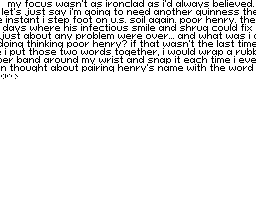

In [18]:
idx = 89
print(generated[idx][0].text)
print(generated[idx][1])
generated[idx][2].to_PIL()[0]

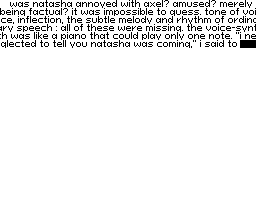

In [452]:
generated[idx][0].to_PIL()[0]

In [453]:
capital = '1 3 5 7 8 17 19 21 23 24 26 29 30 31 33 36 38 40 41 43 48 55 57 58 59 60 61 62 65 70 72 74 76 79 80 81 82 87 88 90 93 95 96 97 99 101 104 106 110 112 115 116 117 118 120 121 122 124 126 131 132 134 138 139 141 143 145 147 148 149 150 151 154 155 157 159 160 162 164 165 166 167 172 174 176 180 181 183 186 187 189 191 192 195 197 198 199'
wrong_word = '19 21 24 58 81 88 106 182 184'
correct = '2 4 20 35 63 111 141 145 158'
non_text = '0 1 3 5 6 7 8 9 10 11 12 13 14 15 16 17 18 22 23 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 59 60 61 62 64 65 66 67 68 69 70 72 71 73 74 75 76 77 78 79 80 82 83 84 85 86 87 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 107 108 109 110 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 142 143 144 146 147 148 149 150 151 152 153 154 155 156 157 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 183 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199'

In [454]:
capitals = set(capital.split(' '))
wrong_words = set(wrong_word.split(' '))
corrects = set(correct.split(' '))
non_texts = set(non_text.split(' '))

In [461]:
print('Acc: ', len(corrects) / 200)
print('Wrong: ', len(wrong_words) / 200)
print('Acc_no_cap: ', len(corrects - capitals) / (200 - len(capitals)))
print('Wrong_no_cap: ', len(wrong_words - capitals) / (200 - len(capitals)))
print('Non_text: ', len(non_texts) / 200)
print('Non_text_no_cap: ', len(non_texts - capitals) / (200 - len(capitals)))
print('Num_no_cap: ', (200 - len(capitals)))
print('Num_total: ', 200)

Acc:  0.045
Wrong:  0.045
Acc_no_cap:  0.06796116504854369
Wrong_no_cap:  0.019417475728155338
Non_text:  0.91
Non_text_no_cap:  0.912621359223301
Num_no_cap:  103
Num_total:  200


In [445]:
total = (list(wrong_words) + list(corrects) + list(non_texts))
total = list(map(lambda x: int(x), total))
total.sort()
print(total)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


In [446]:
set(range(200)) - set(total)

{70, 72, 166}

Add OCR

In [77]:
idx = 199
pro = generated[idx][0]
t = generated[idx][1]
g   = generated[idx][2]
img = g[pro._num_text_patches[0]-1:g._num_text_patches[0]-1].to_PIL(square = False)[0]
img = img.resize((20*4*2, 20))
display(img)
img = np.array(img)
ocr = PaddleOCR( det=False, cls = False, lang="en")
result = ocr.ocr(img, cls=True,)
text = result[0][0][1][0].lower()
print("Predictions:",text,"\nTarget:", t)


[2023/11/13 10:29:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/sc118/sc118/xliao11/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/sc118/sc118/xliao11/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, 